# Folium 이용하여 '코로나 바이러스' 지도 표시

## ㅇ코로나 바이러스 데이터 분석 - 환경 설정 및 데이터 구조 파악


### 라이브러리 import 및 데이터 업로드

In [3]:
#!pip install folium

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

###  데이터 구조 파악하기

###데이터 pandas로 불러오기

In [5]:
coronaDF = pd.read_csv("https://github.com/gzone2000/my_machine_learning/raw/master/ml5/covid_19_clean_complete.csv")

###데이터 확인하기

In [6]:
coronaDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


###결측 값 확인

In [7]:
coronaDF.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

### 데이터 타입 조회

In [8]:
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


### Date 정보 수정 (Object => datetime)

In [11]:
coronaDF['Date'] = pd.to_datetime(coronaDF['Date'])
coronaDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


## 코로나 바이러스 데이터 분석 - 국가별 최신 확진자, 사망자, 회복자 데이터 분석



### 최신 데이터만 남기기

In [12]:
latestDF = coronaDF[coronaDF['Date'] == max(coronaDF['Date'])]

### 국가별 합계 구하기

In [13]:
latest_country_sum = latestDF.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
latest_country_sum

<ipython-input-13-4574f7da3fc5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latest_country_sum = latestDF.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
182,West Bank and Gaza,10621,78,3752
183,Western Sahara,10,1,8
184,Yemen,1691,483,833
185,Zambia,4552,140,2815


### 사망자 높은 국가순으로 정렬하기

In [14]:
latest_country_sum = latest_country_sum.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
latest_country_sum

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
...,...,...,...,...
182,Dominica,18,0,18
183,Saint Kitts and Nevis,17,0,15
184,Greenland,14,0,13
185,Holy See,12,0,12


### 데이터 전체 조회하기


In [15]:
latest_country_sum.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
5,Mexico,395489,44022,303810
6,Peru,389717,18418,272547
7,Chile,347923,9187,319954
8,United Kingdom,301708,45844,1437
9,Iran,293606,15912,255144


## 코로나 바이러스 데이터 분석 - 시간에 따른 확진자, 사망자, 회복자 시각화

### 날짜별 확진자, 사망자, 회복자 합계 구하기

In [16]:
date_status = coronaDF.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
date_status = date_status.sort_index()
date_status

<ipython-input-16-ee5521334fae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  date_status = coronaDF.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-23,15510481,633506,8710969
2020-07-24,15791645,639650,8939705
2020-07-25,16047190,644517,9158743


### 시간에 따른 누적 확진자, 사망자, 회복자 그래프 (seaborn lineplot)

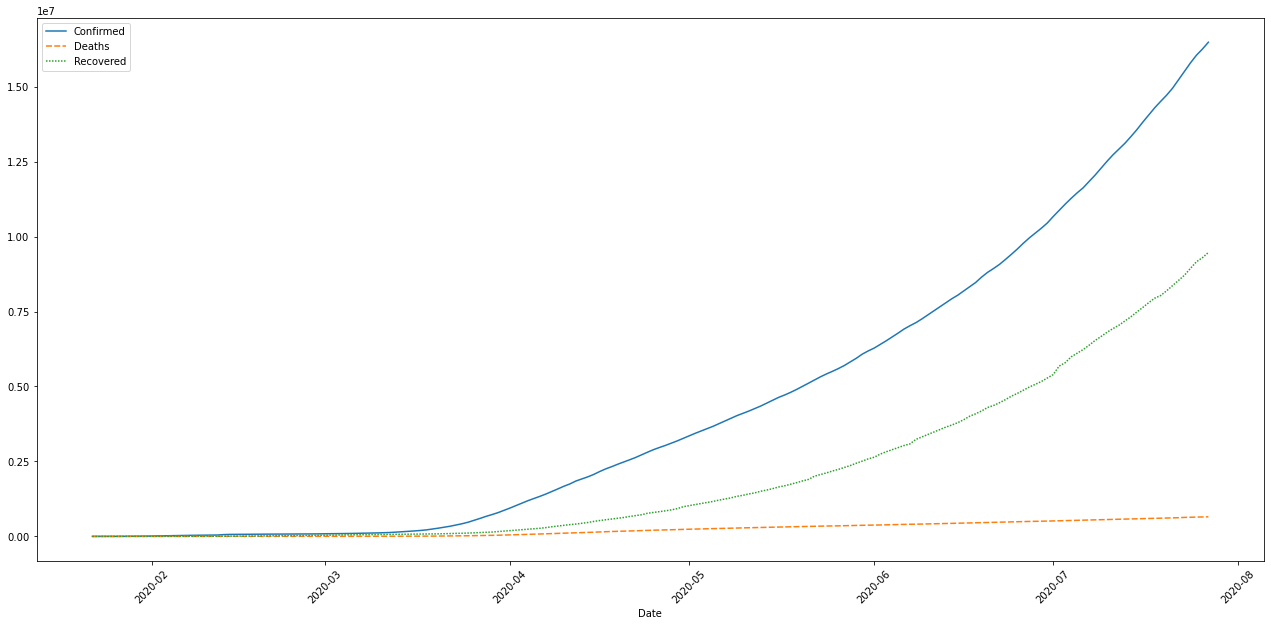

In [17]:
plt.figure(figsize=(22,10))
plt.xticks(rotation = 45 )
sns.lineplot(data=date_status)

## 전세계 코로나 바이러스 감염 지도 표시 - folium 라이브러리 소개 및 설명

### folium 사용해보기

In [18]:
import folium
m = folium.Map()
m

### folium으로 서울 지도 표시하기

In [19]:
m = folium.Map(location=[37.715133, 126.734086])
m

### zoom 조절하기

In [20]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
m

### CircleMarker 그리기

In [21]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
folium.CircleMarker([37.559533, 126.972464], radius=100).add_to(m)
m

### CircleMarker 색상, 채우기, 채우기 색상 설정

In [22]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
folium.CircleMarker([37.559533, 126.972464], radius=100, color="#ef9008", fill="True", fill_color="#ef9008").add_to(m)
m

### CircleMarker로 popup 표시

In [23]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
folium.CircleMarker([37.559533, 126.972464], radius=100, color="#ef9008", fill="True", fill_color="#ef9008", popup="hi").add_to(m)
m

#전세계 코로나 바이러스 감염 지도 표시 - 전세계 코로나 바이러스 감염 지도 시각화

### 국가별 최신 확진자 데이터 조회

In [24]:
latestDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### 지도에 전세계 국가별 확진자 수 CircleMarker로 표시

In [41]:
m = folium.Map(location=[0, 0], zoom_start=4)
for n in latestDF.index:
    folium.CircleMarker([latestDF['Lat'][n], latestDF['Long'][n]], radius = int(latestDF['Confirmed'][n]/10000)
    , color='red', fill="True", fill_color='red', popup=latestDF['Country/Region'][n] + ":" + str(latestDF['Confirmed'][n])).add_to(m)
m